# Unsupervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Bao Tran**  |  03/17  |  Create notebook, clean data in firmographic dataset.Reorganize folder and files.
- **Kiet Vu**  |  03/17  | Minor Editing.
---

- **[Clustering](#Clustering)**: 
Clustering is an unsupervised learning method that groups similar data points together based on the categorical attributes. There are several clustering algorithms available, including k-means, hierarchical clustering, and DBSCAN.
        Columns chosen:
<br>

- **[Principal Component Analysis (PCA)](#PCA)**: 
PCA is a dimensionality reduction technique that can be used to identify the underlying patterns in the categorical data. PCA transforms the categorical attributes into a lower-dimensional space, where the new dimensions are orthogonal and capture the most variance in the data.
        Columns chosen:
<br>

- **[Association Rule Mining](#AssociationRuleMining)**: 
Association rule mining is a technique used to discover frequent co-occurrences or correlations between categorical attributes. It can be used to identify relationships between different attributes and discover interesting patterns in the data.
        Columns chosen:
<br>

- **[Self-Organizing Maps (SOMs)](#SOM)**: 
SOMs are a type of artificial neural network that can be used for clustering and visualization of high-dimensional data. SOMs are useful for discovering hidden structures and patterns in the data.
        Columns chosen:
<br>

**it's important to note that unsupervised learning methods cannot make predictions on new data, as they do not have a target variable to train on. Instead, they can be used for exploratory analysis and to gain insights into the data.**

---

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [2]:
df_firmographic = pd.read_csv("Raw Data/firmographic_append_data_20230306.csv", low_memory=False)
df_firmographic.head(15)

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_ASSET_FLAG,B2B_BANKRUPTCY_DATE,B2B_BANKRUPTCY_FLAG,...,B2B_TOT_SALES_VOLUME,B2B_TRANSACTION_CODE,B2B_TRANSACTION_TYPE,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT
0,0001230a214b39e0e5c463bfe440fb15,44240.0,OH,NaN,C,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing
1,000345e997e72b61b990d2689c76427f,15218.0,PA,NaN,D,A,C,NaN,NaN,NaN,...,NaN,A,NaN,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067.0,OH,ADMV,C,B,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,1.0,NaN,16.0,201909.0,Personal Services
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618.0,IL,NaN,D,NaN,B,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work
4,00095201031df44962513f378842d521,61111.0,IL,DMV,A,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise
5,000a04481ee5acbb856a7c485a67423a,62526.0,IL,NaN,E,A,D,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,1.0,50.0,201902.0,Personal Services
6,000a1fe8f9d0caf306b805de359b6947,14472.0,NY,NaN,G,B,F,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,D,NaN,1.0,54.0,202208.0,Wholesale
7,000bee0b537b676a975a15999776581f,2110.0,MA,NaN,C,B,C,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,A,NaN,NaN,10.0,202011.0,Food and Dining
8,000c88d34beda722f7b559bb056b7809,78064.0,TX,ADMV,A,A,A,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,A,NaN,NaN,29.0,201303.0,Hotels and Educational Boarding
9,000cc270c1cc3f09a4a80c2489ce4bac,8401.0,NJ,ADMV,E,A,E,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,B,NaN,NaN,10.0,200309.0,Food and Dining


---
## Clustering <a class="anchor" id="Clustering"></a>

However, it's important to note that clustering is an exploratory technique, and the resulting clusters may not have any causal or predictive relationship with the outcome of interest. In some cases, clustering may be used as a preprocessing step for other machine learning techniques, such as classification or regression, where the resulting clusters are used as a feature or input to the model.

https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

In [3]:
df_firmographic_copy = df_firmographic.copy()
df_cluster = df_firmographic_copy[["B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_cluster_copy = df_cluster.copy()

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cluster = df_cluster.apply(le.fit_transform)
df_cluster

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,B2B_SMALL_SIZE_FLAG,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT
0,2,3,6,11,2,3,4,5,3,0,0,1,0,2,1,3,4,7,7,22
1,1,3,0,11,2,3,4,8,3,0,1,0,0,2,3,1,5,3,3,91
2,2,3,6,11,2,3,4,2,3,0,0,1,0,2,1,0,3,1,8,13
3,1,3,6,11,2,3,4,1,3,0,1,0,0,2,2,2,3,7,2,18
4,0,3,6,11,2,3,4,2,3,0,0,0,0,2,0,0,0,0,5,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59881,0,3,0,11,2,3,4,1,3,0,1,0,0,2,1,0,3,3,3,86
59882,1,3,6,11,2,3,4,1,3,0,1,0,0,2,0,1,2,0,1,14
59883,1,3,6,11,2,3,4,2,3,0,1,0,0,2,1,0,4,6,8,18
59884,3,3,6,11,2,3,4,6,1,0,0,0,0,2,7,7,7,7,6,73


In [5]:
# Importing Libraries

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install kmodes
from kmodes.kmodes import KModes

Cao initialization

In [6]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13739, cost: 375941.0
Run 1, iteration: 2/100, moves: 564, cost: 375941.0


In [7]:
fitClusters_cao

array([1, 1, 0, ..., 1, 1, 0], dtype=uint16)

In [8]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,B2B_SMALL_SIZE_FLAG,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT
0,0,3,6,11,2,3,4,1,3,0,0,0,0,2,0,0,2,0,4,7
1,1,3,6,11,2,3,4,2,3,0,0,0,0,2,7,7,7,7,9,91


Huang initialization

In [9]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_cluster)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9692, cost: 382368.0
Run 1, iteration: 2/100, moves: 5738, cost: 380427.0
Run 1, iteration: 3/100, moves: 319, cost: 380427.0


In [10]:
fitClusters_huang

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [11]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,B2B_SMALL_SIZE_FLAG,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT
0,0,3,6,11,2,3,4,1,3,0,0,0,0,2,0,0,2,0,8,7
1,3,3,6,11,2,3,4,7,3,0,0,0,0,2,2,3,5,7,7,91


Choosing K by comparing Cost against each K

In [12]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cluster)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 424952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13739, cost: 375941.0
Run 1, iteration: 2/100, moves: 564, cost: 375941.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16408, cost: 340477.0
Run 1, iteration: 2/100, moves: 7621, cost: 337548.0
Run 1, iteration: 3/100, moves: 1291, cost: 337548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14932, cost: 322597.0
Run 1, iteration: 2/100, moves: 7362, cost: 321879.0
Run 1, iteration: 3/100, moves: 340, cost: 321879.0


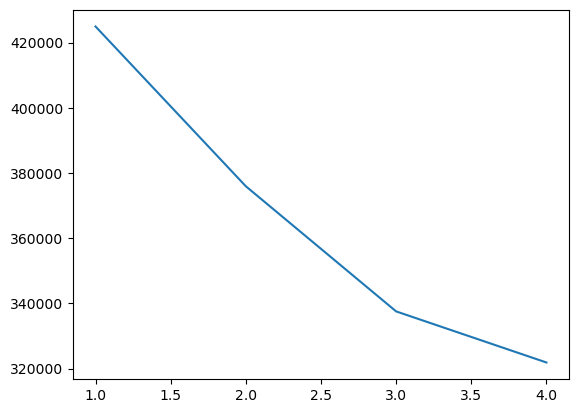

In [13]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

"elbow curve" -> k=3, we do CAO again

In [14]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16408, cost: 340477.0
Run 1, iteration: 2/100, moves: 7621, cost: 337548.0
Run 1, iteration: 3/100, moves: 1291, cost: 337548.0


In [15]:
fitClusters_cao

array([2, 2, 2, ..., 0, 1, 0], dtype=uint16)

In [16]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,B2B_SMALL_SIZE_FLAG,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT
0,0,3,6,11,2,3,4,1,3,0,1,0,0,2,0,0,2,0,4,7
1,0,3,6,11,2,3,4,7,3,0,0,0,0,2,7,7,7,7,9,0
2,1,3,6,11,2,3,4,2,3,0,0,0,0,2,2,3,5,7,2,91


combine the prediction to the OG df

In [17]:
df_cluster = df_cluster_copy.reset_index()

In [18]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_cluster, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [19]:
combinedDf.head()

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,...,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT,cluster_predicted
0,C,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,N,...,Y,N,NaN,B,D,E,NaN,Manufacturing,25.0,2
1,B,NaN,A,NaN,NaN,NaN,NaN,A,NaN,N,...,N,N,NaN,D,B,F,D,Business and Finance,99.0,2
2,C,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,Y,N,NaN,B,A,D,B,Personal Services,16.0,2
3,B,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,C,C,D,NaN,Blue Collar Work,21.0,2
4,A,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,N,N,NaN,A,A,A,A,General Merchandise,83.0,0


Cluster Identification (Graphic)

In [20]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [21]:
cluster_0

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,...,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT,cluster_predicted
4,A,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,N,N,NaN,A,A,A,A,General Merchandise,83.0,0
7,B,2.0,NaN,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,A,A,B,B,Food and Dining,10.0,0
8,A,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,A,A,A,A,Hotels and Educational Boarding,29.0,0
13,A,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,N,...,N,N,NaN,A,A,B,A,Personal Services,16.0,0
14,A,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,N,...,N,N,NaN,A,A,B,E,Personal Services,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59879,A,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,A,A,C,A,Business and Finance,97.0,0
59881,A,NaN,A,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,B,A,D,D,Business and Finance,94.0,0
59882,B,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,A,B,C,A,Auto,17.0,0
59883,B,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,N,N,NaN,B,A,E,G,Personal Services,21.0,0


In [22]:
cluster_1

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,...,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT,cluster_predicted
11,C,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,N,...,N,N,NaN,B,B,E,B,"Public, Health, and Social Services",97.0,1
12,X,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,N,...,N,N,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,1
17,F,1.0,NaN,G,NaN,NaN,NaN,8,U,Y,...,N,N,NaN,E,C,G,NaN,Food and Dining,70.0,1
18,D,NaN,NaN,NaN,NaN,NaN,NaN,6,O,N,...,N,N,NaN,NaN,NaN,NaN,NaN,Personal Services,57.0,1
21,A,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,N,...,N,N,NaN,NaN,NaN,NaN,NaN,Amusement and Recreation Services,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59872,F,2.0,NaN,NaN,NaN,NaN,NaN,8,L,Y,...,N,N,NaN,NaN,NaN,NaN,NaN,Hotels and Educational Boarding,88.0,1
59874,A,NaN,F,NaN,NaN,NaN,NaN,X,NaN,N,...,N,N,NaN,NaN,NaN,NaN,NaN,"Public, Health, and Social Services",94.0,1
59876,A,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,N,...,N,N,NaN,C,E,E,D,Wholesale,48.0,1
59877,F,2.0,F,NaN,2.0,NaN,NaN,8,L,Y,...,N,N,NaN,G,G,G,G,Business and Finance,0.0,1


In [23]:
cluster_2

,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_STATUS_CODE,B2B_OFFICE_SIZE,B2B_TOT_EMPLOYEE_SIZE,B2B_PUBLIC_INDICATOR,B2B_IMPORT_EXPORT_FLAG,B2B_GOVERNMENT_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_OWN_LEASE_FLAG,B2B_BIG_BUSINESS_INDICATOR,...,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_RESTAURANT_SRVCE_TYPE,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT,cluster_predicted
0,C,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,N,...,Y,N,NaN,B,D,E,NaN,Manufacturing,25.0,2
1,B,NaN,A,NaN,NaN,NaN,NaN,A,NaN,N,...,N,N,NaN,D,B,F,D,Business and Finance,99.0,2
2,C,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,Y,N,NaN,B,A,D,B,Personal Services,16.0,2
3,B,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,N,...,N,N,NaN,C,C,D,NaN,Blue Collar Work,21.0,2
5,C,NaN,A,NaN,NaN,NaN,NaN,5,NaN,N,...,N,N,NaN,C,D,E,D,Personal Services,50.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59863,C,2.0,NaN,NaN,2.0,NaN,NaN,5,NaN,N,...,N,N,NaN,D,D,G,E,Business and Finance,99.0,2
59865,A,2.0,NaN,NaN,NaN,NaN,8.0,5,U,N,...,N,N,NaN,C,D,F,G,Hotels and Educational Boarding,93.0,2
59866,B,2.0,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,N,N,NaN,B,D,D,NaN,Personal Services,40.0,2
59871,D,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,N,...,Y,N,NaN,C,B,F,NaN,Blue Collar Work,19.0,2


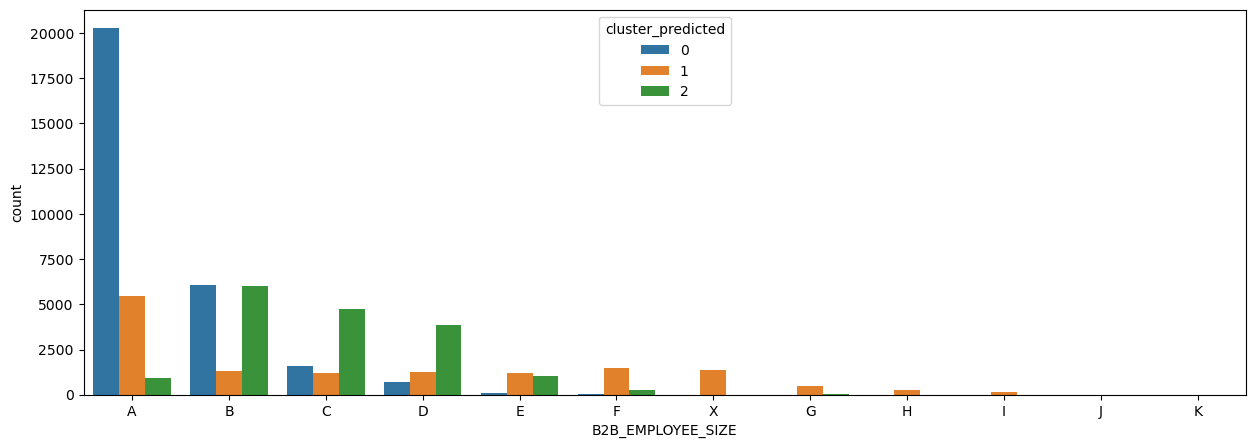

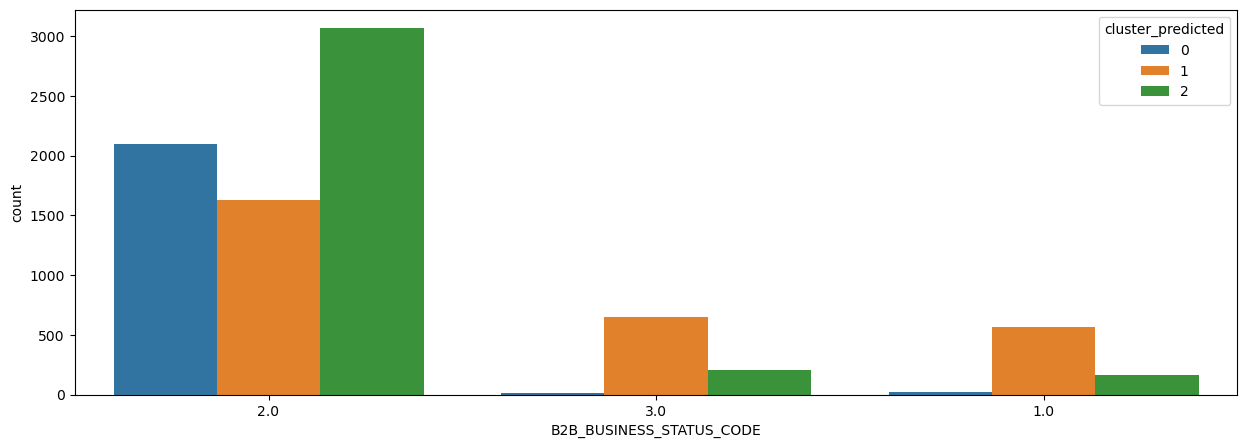

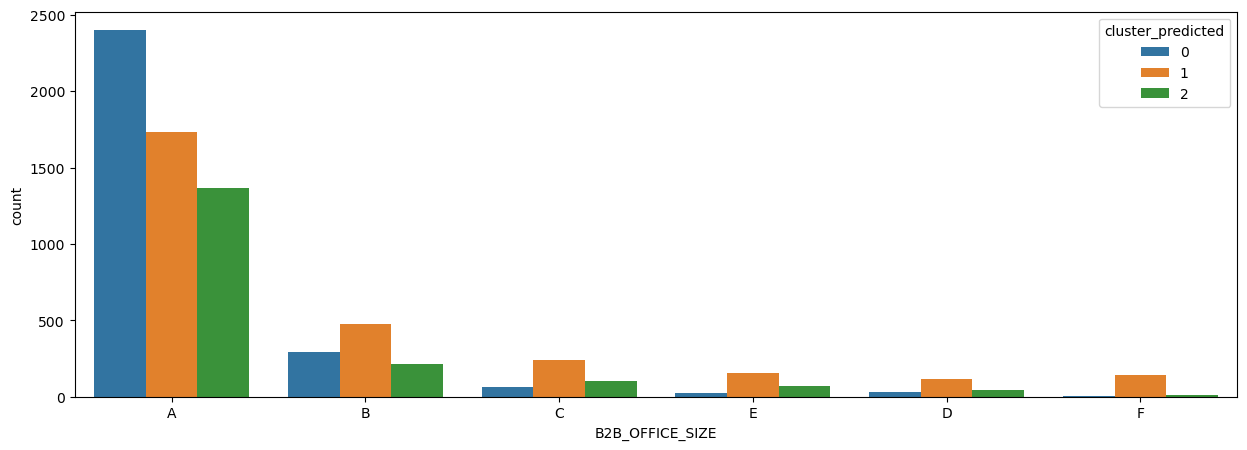

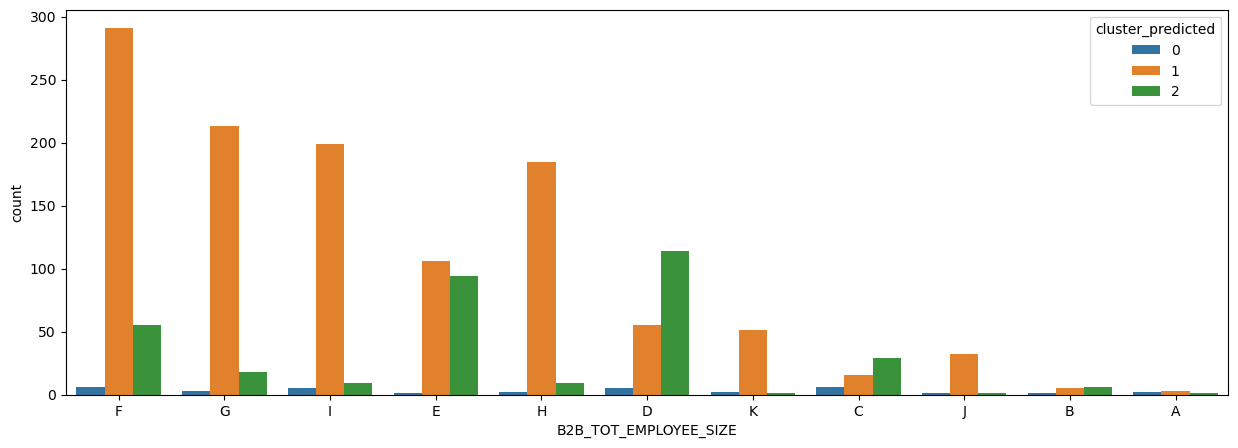

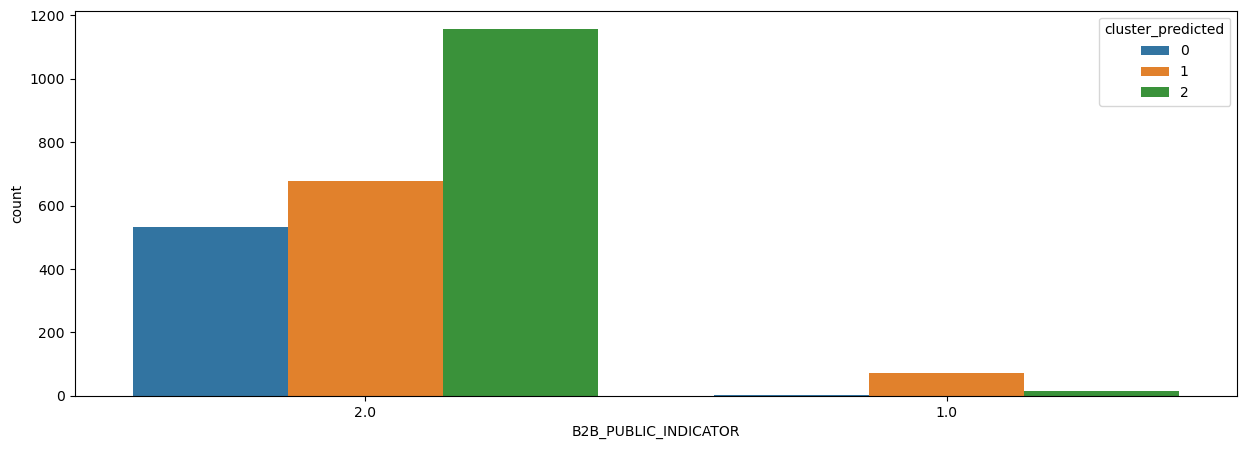

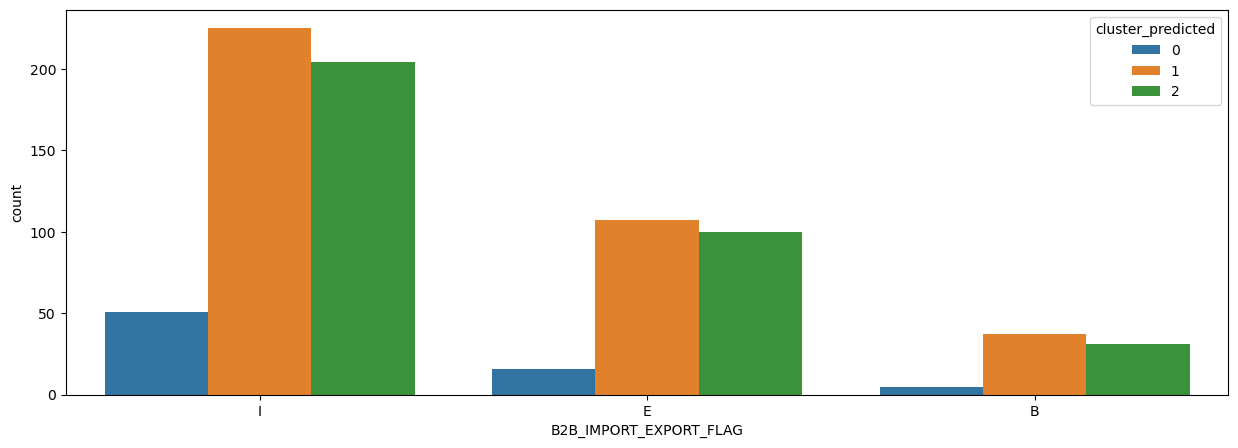

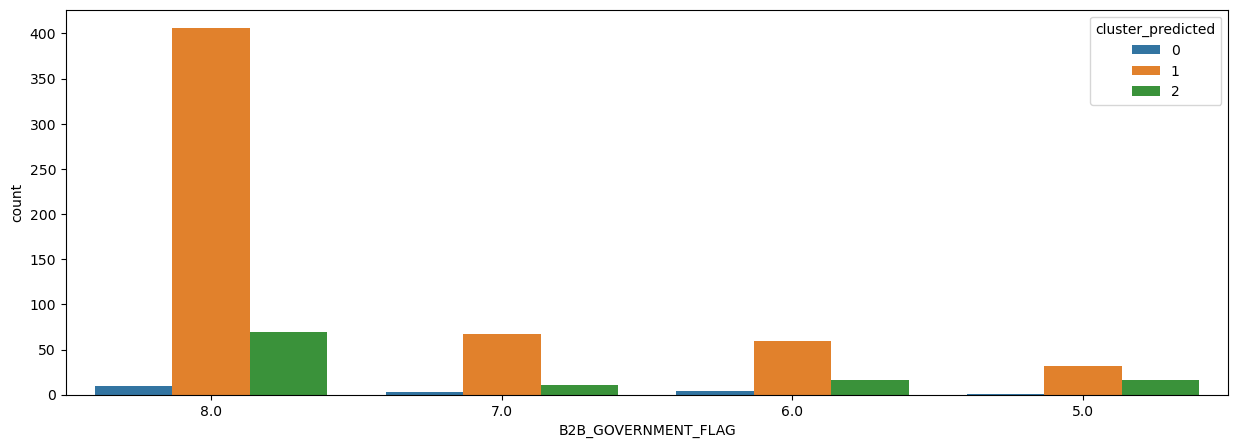

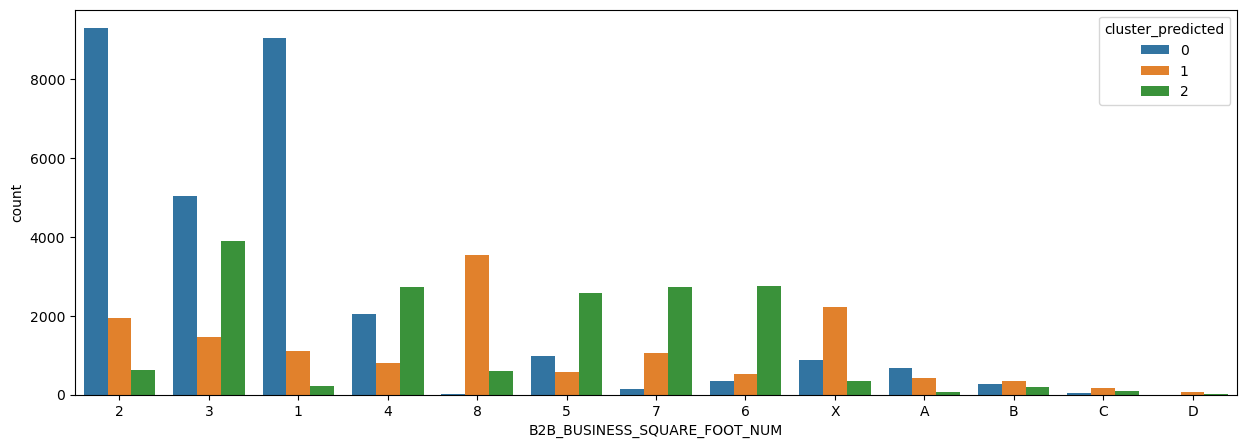

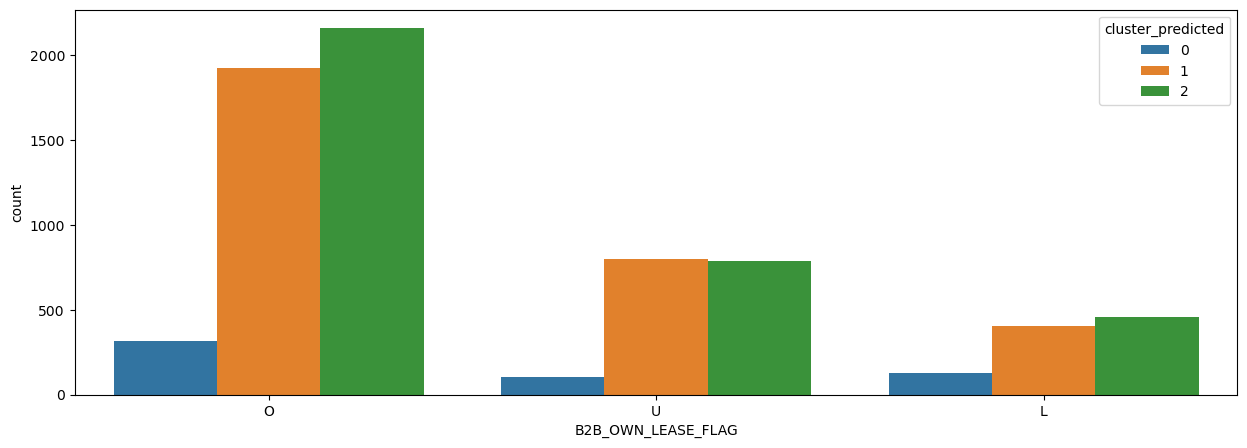

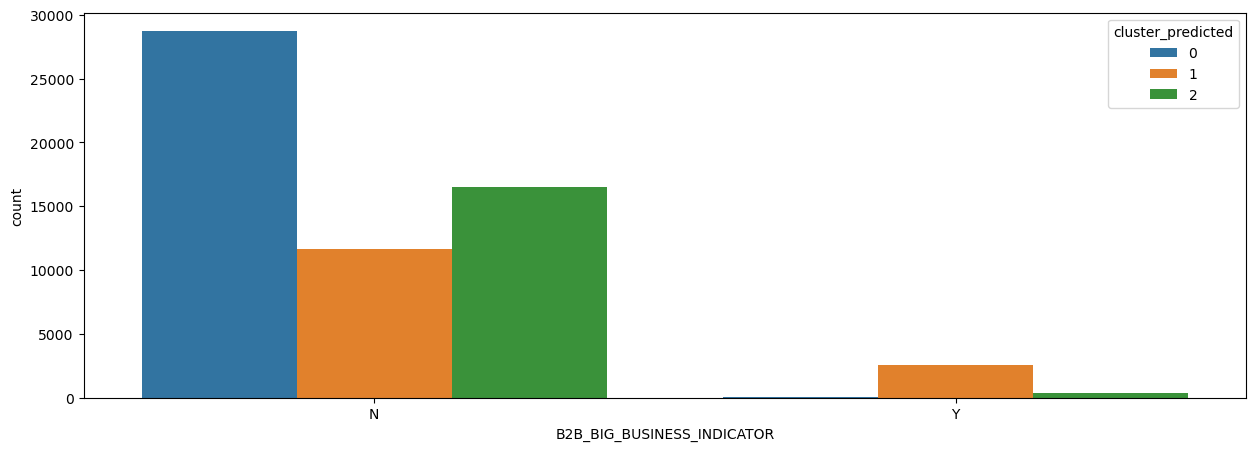

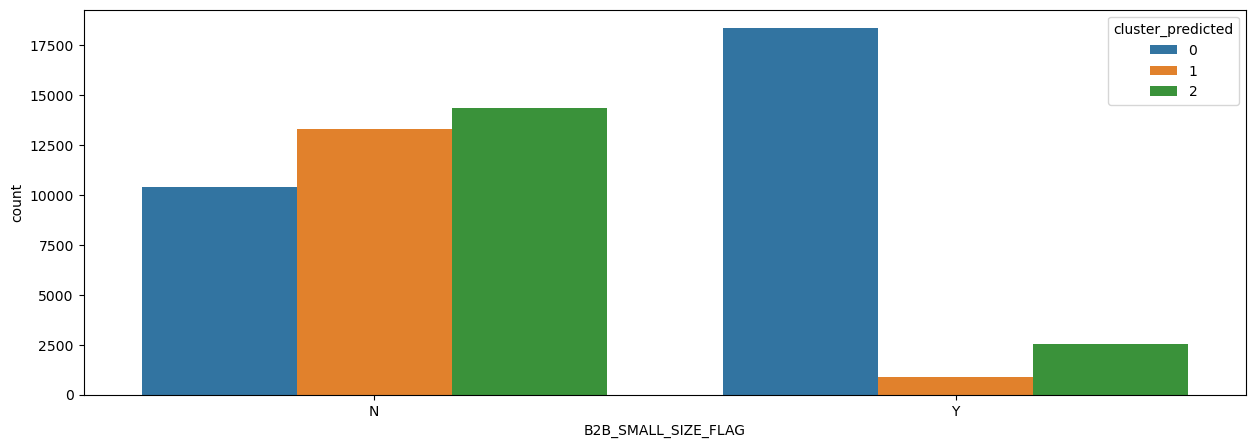

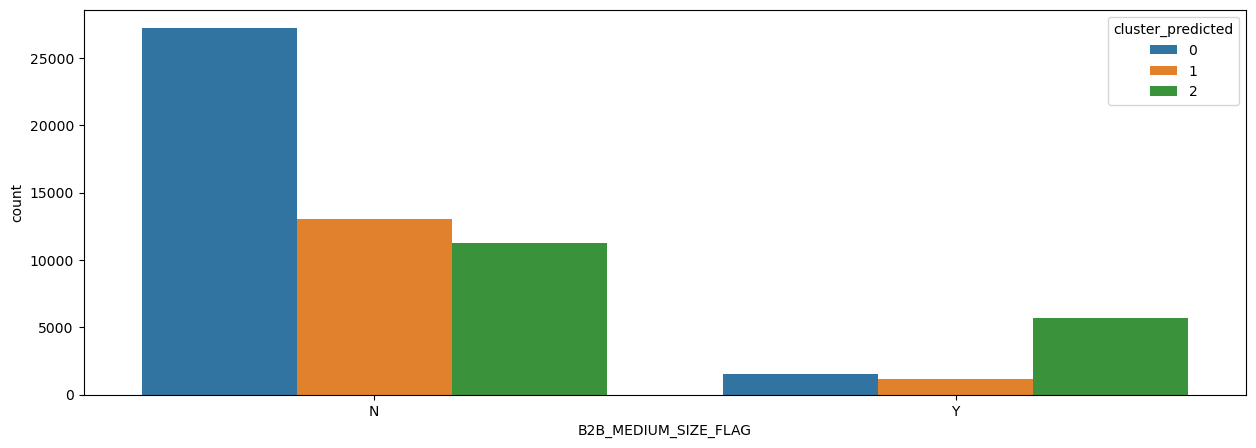

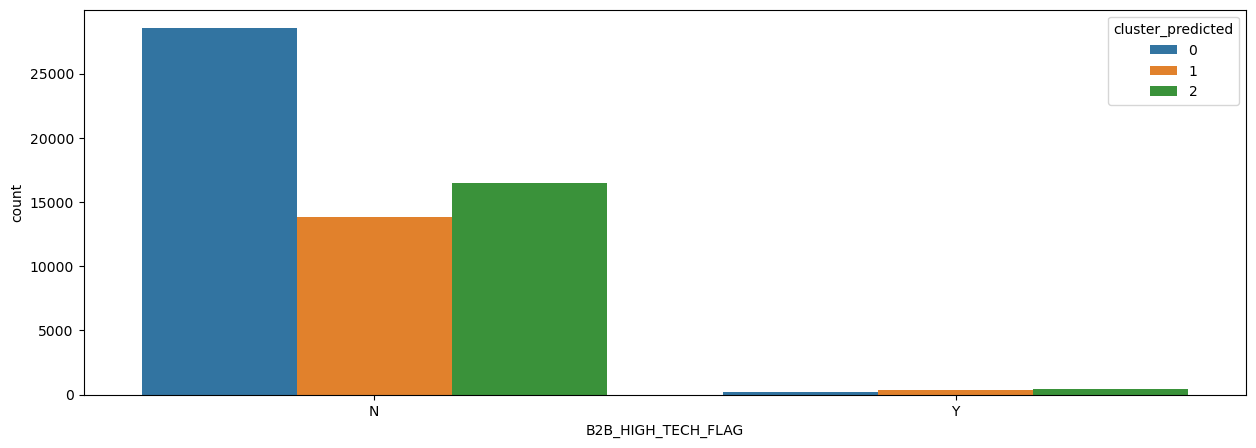

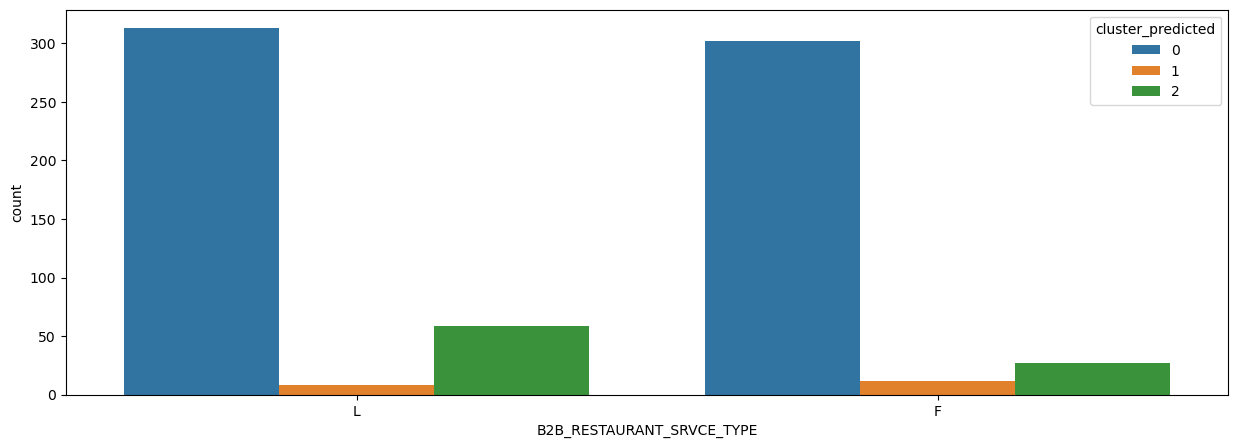

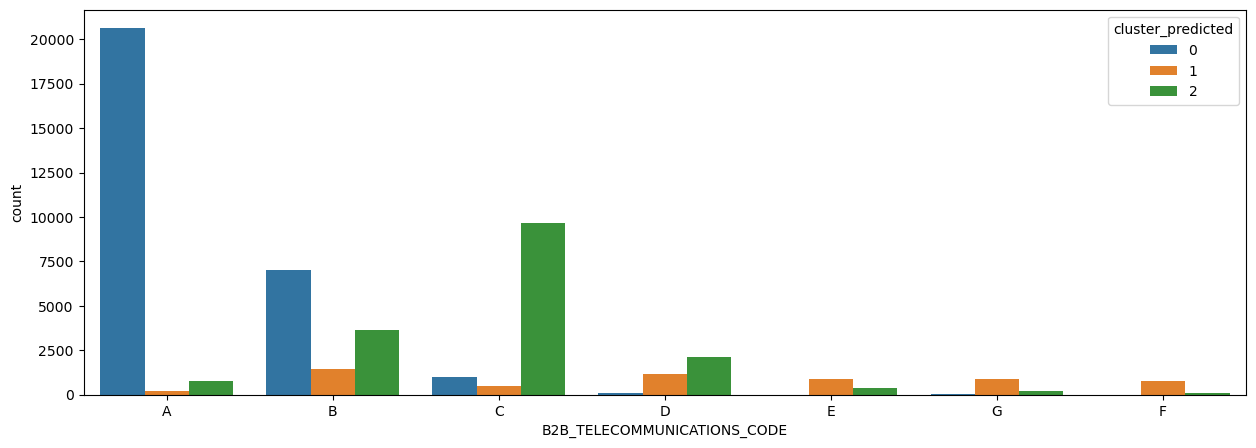

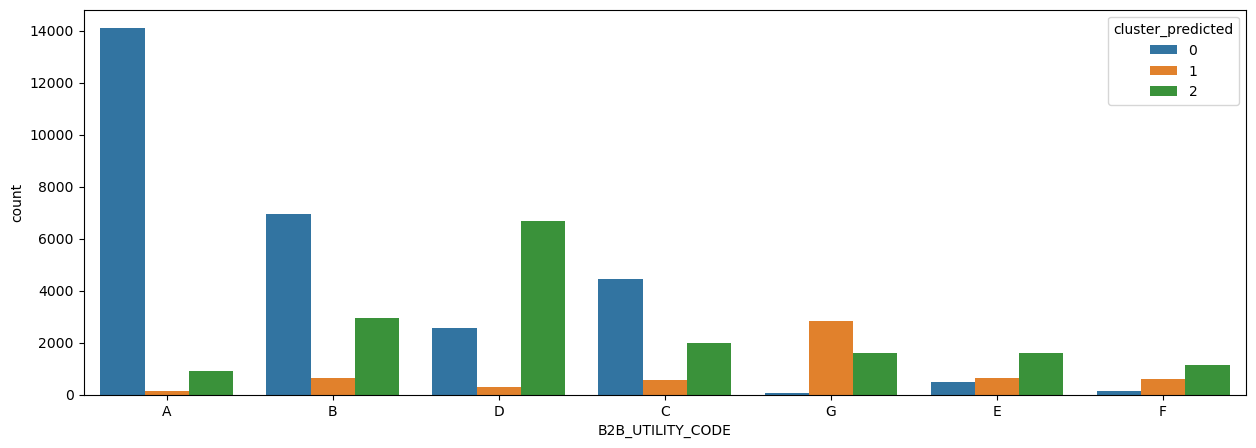

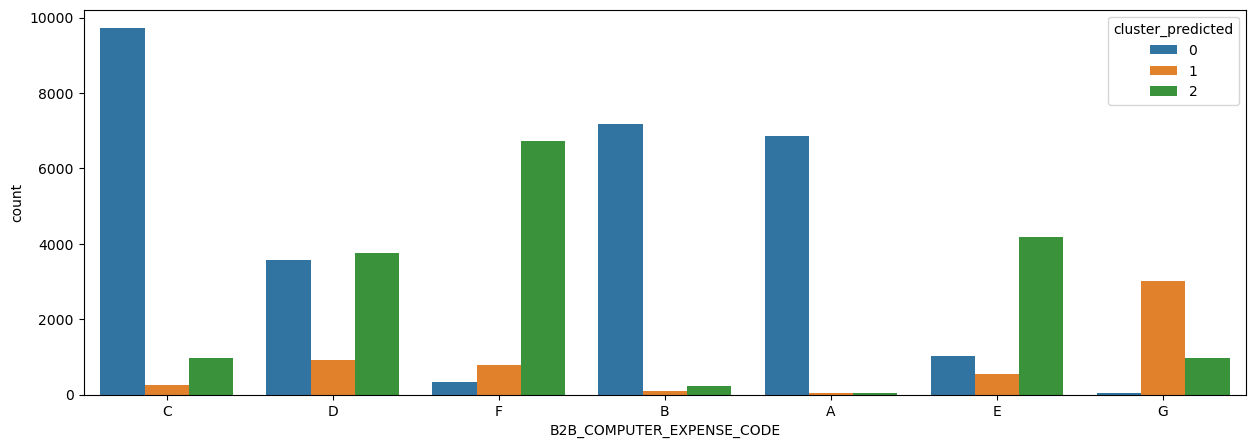

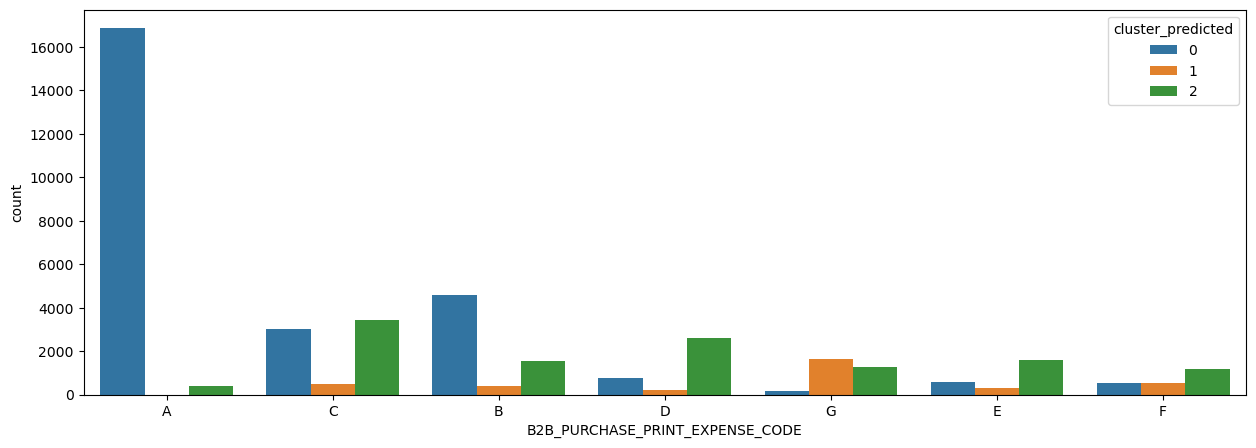

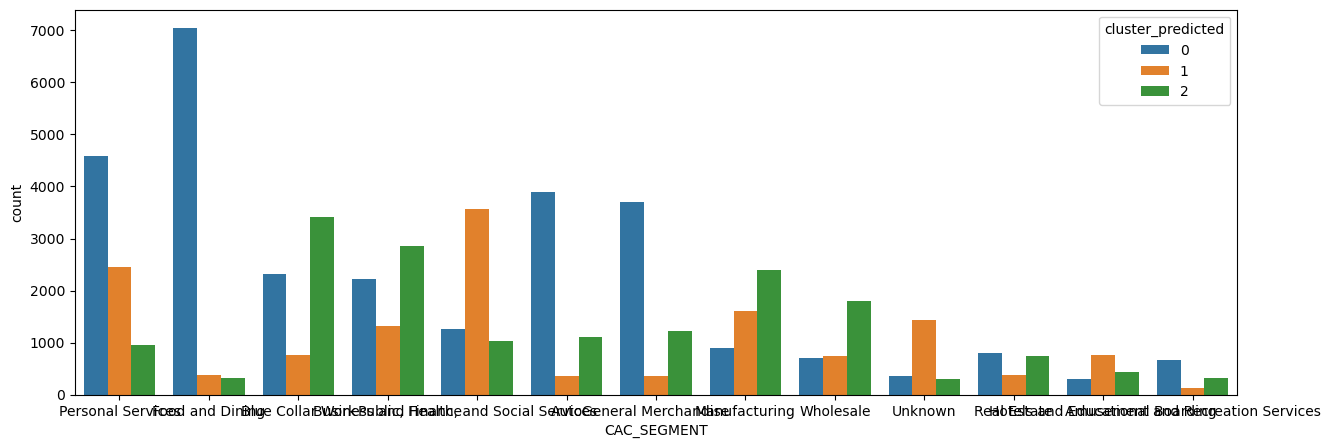

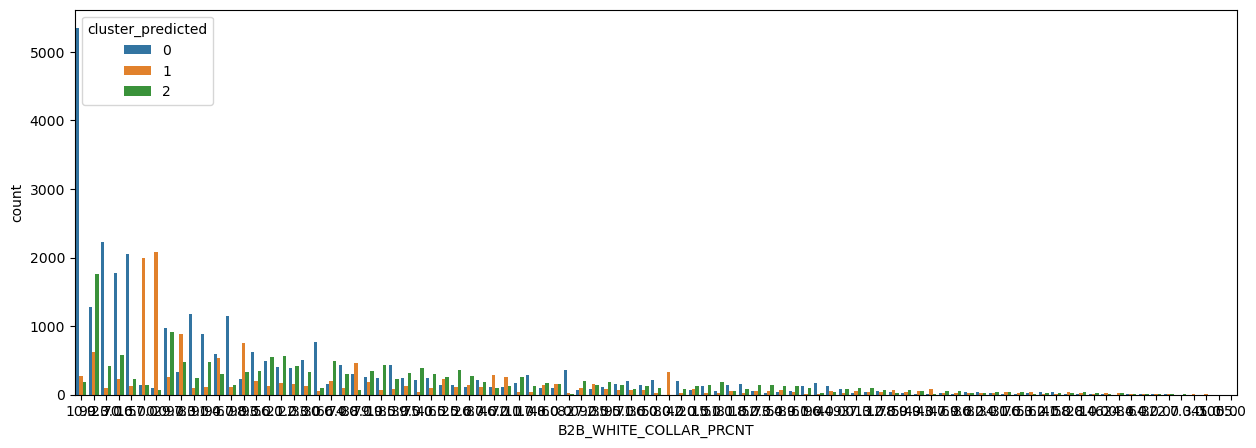

In [24]:
# last 2 variables'graph need to be fixed later
variable_list = ["B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]
for variable in variable_list:
    plt.subplots(figsize = (15,5))
    sns.countplot(x=combinedDf[variable],order=combinedDf[variable].value_counts().index,hue=combinedDf['cluster_predicted'])
    plt.show()

need dictionary / explaination of each variable

---
## Principal Component Analysis (PCA) <a class="anchor" id="PCA"></a>

---
## Association Rule Mining <a class="anchor" id="AssociationRuleMining"></a>

---
## Self-Organizing Maps (SOMs) <a class="anchor" id="SOM"></a>